In [49]:
#!pip install prophet

# in-Sample Forecast

In [41]:
# cell 1
# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)

14:55:36 - cmdstanpy - INFO - Chain [1] start processing
14:55:36 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# cell 2
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
 date = '1968-%02d' % i
 future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14366.950441  12829.706564  16013.851004
1 1968-02-01  14931.417879  13366.786348  16539.954872
2 1968-03-01  20853.806412  19448.162981  22451.783291
3 1968-04-01  22896.047629  21293.412556  24502.276714
4 1968-05-01  24212.079305  22641.383941  25841.363122


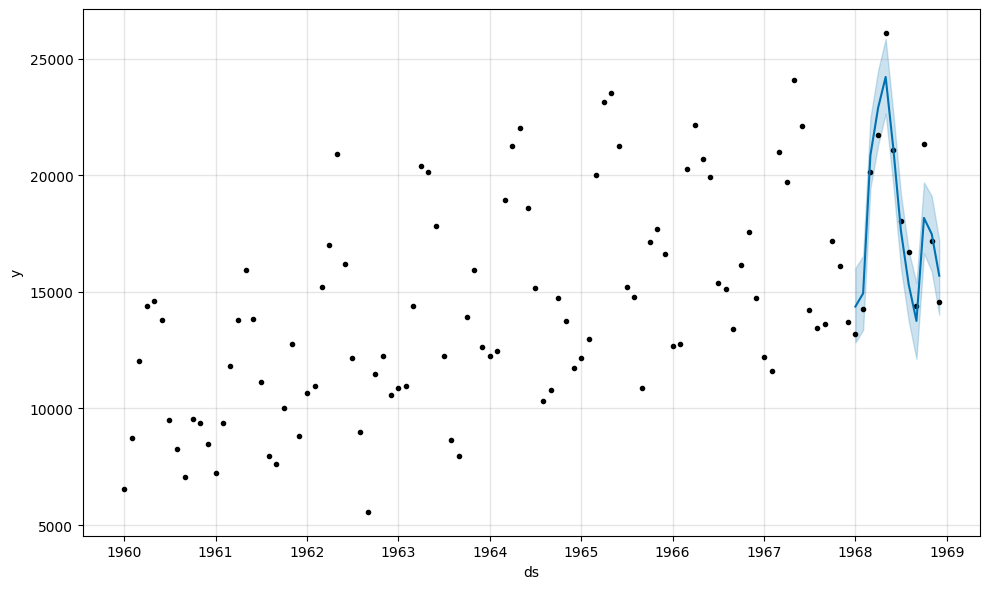

In [48]:
# cell 3
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()


# out-of-sample forecast

# make an out-of-sample forecast

In [54]:
# cell 1
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
df

15:00:33 - cmdstanpy - INFO - Chain [1] start processing
15:00:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [55]:
# cell 2
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
 date = '1969-%02d' % i
 future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
future

,ds
0,1969-01-01
1,1969-02-01
2,1969-03-01
3,1969-04-01
4,1969-05-01
5,1969-06-01
6,1969-07-01
7,1969-08-01
8,1969-09-01
9,1969-10-01


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15414.503433  13725.535450  16763.981588
1 1969-02-01  16169.601828  14502.465729  17883.616526
2 1969-03-01  21375.275888  19872.782918  22998.400176
3 1969-04-01  23513.699386  21936.840602  25103.828750
4 1969-05-01  25030.879738  23480.850184  26668.902407


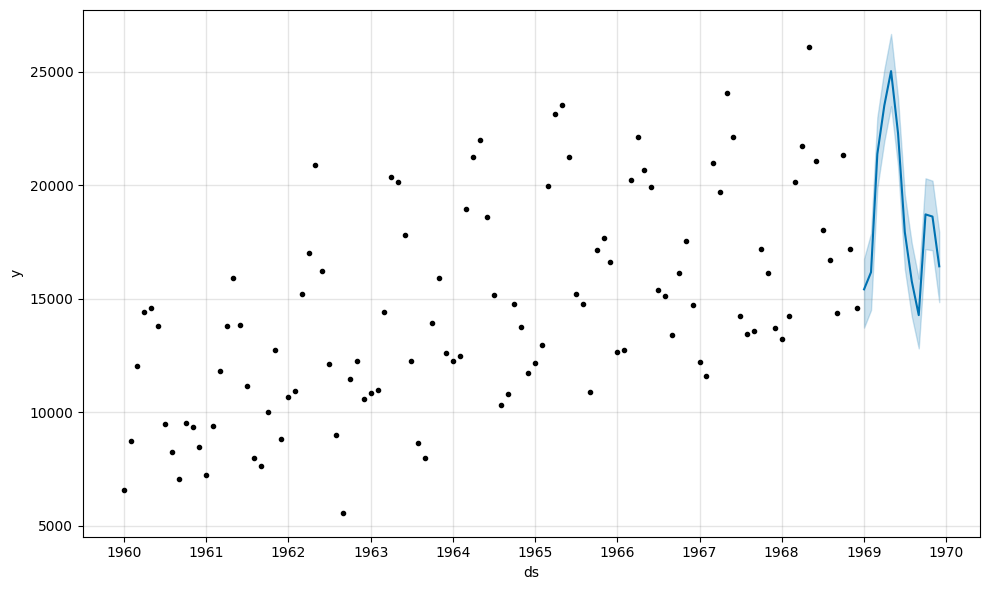

In [56]:
# cell 3
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

# manually evaluate forecast model

In [59]:
# cell 1
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


15:04:45 - cmdstanpy - INFO - Chain [1] start processing
15:04:47 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
train

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119


In [63]:
# cell 2
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
 date = '1968-%02d' % i
 future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)

In [69]:
forecast[['ds','yhat']]

,ds,yhat
0,1968-01-01,14512.982570
1,1968-02-01,14930.906319
2,1968-03-01,20842.179206
3,1968-04-01,23000.679891
4,1968-05-01,23350.155458
5,1968-06-01,20972.268814
6,1968-07-01,17359.542425
7,1968-08-01,14785.206440
8,1968-09-01,13521.404294
9,1968-10-01,17058.064639


MAE: 1336.813


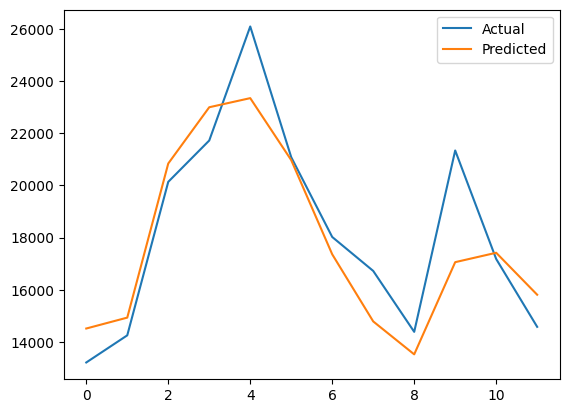

In [70]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()